## <center> Exercise Clustering </center>


#### CIA Country Analysis

Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

**Goal**:
Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? 

#### Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Machine Learning/Unsupervised Learning/KMeans Clustering/Data Sets/CIA_Country_Facts.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [4]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


**TASK: Create a histogram of the Population column. You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people**

(0.0, 500000000.0)

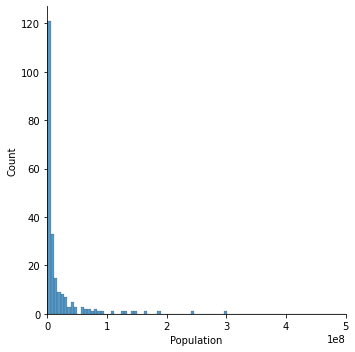

In [5]:
sns.displot(data=df, x="Population")
plt.xlim(0, 0.5E9)

**TASK: Now let's explore GDP and Regions. Create a bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

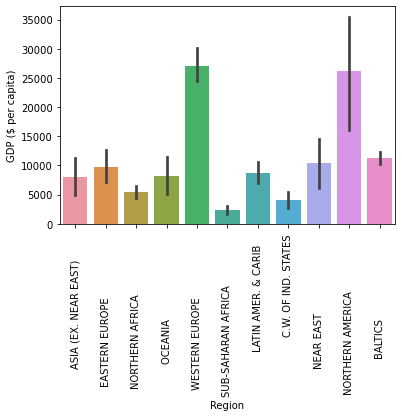

In [6]:
sns.barplot(data=df, x="Region", y="GDP ($ per capita)")
plt.xticks(rotation=90);

**TASK: Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

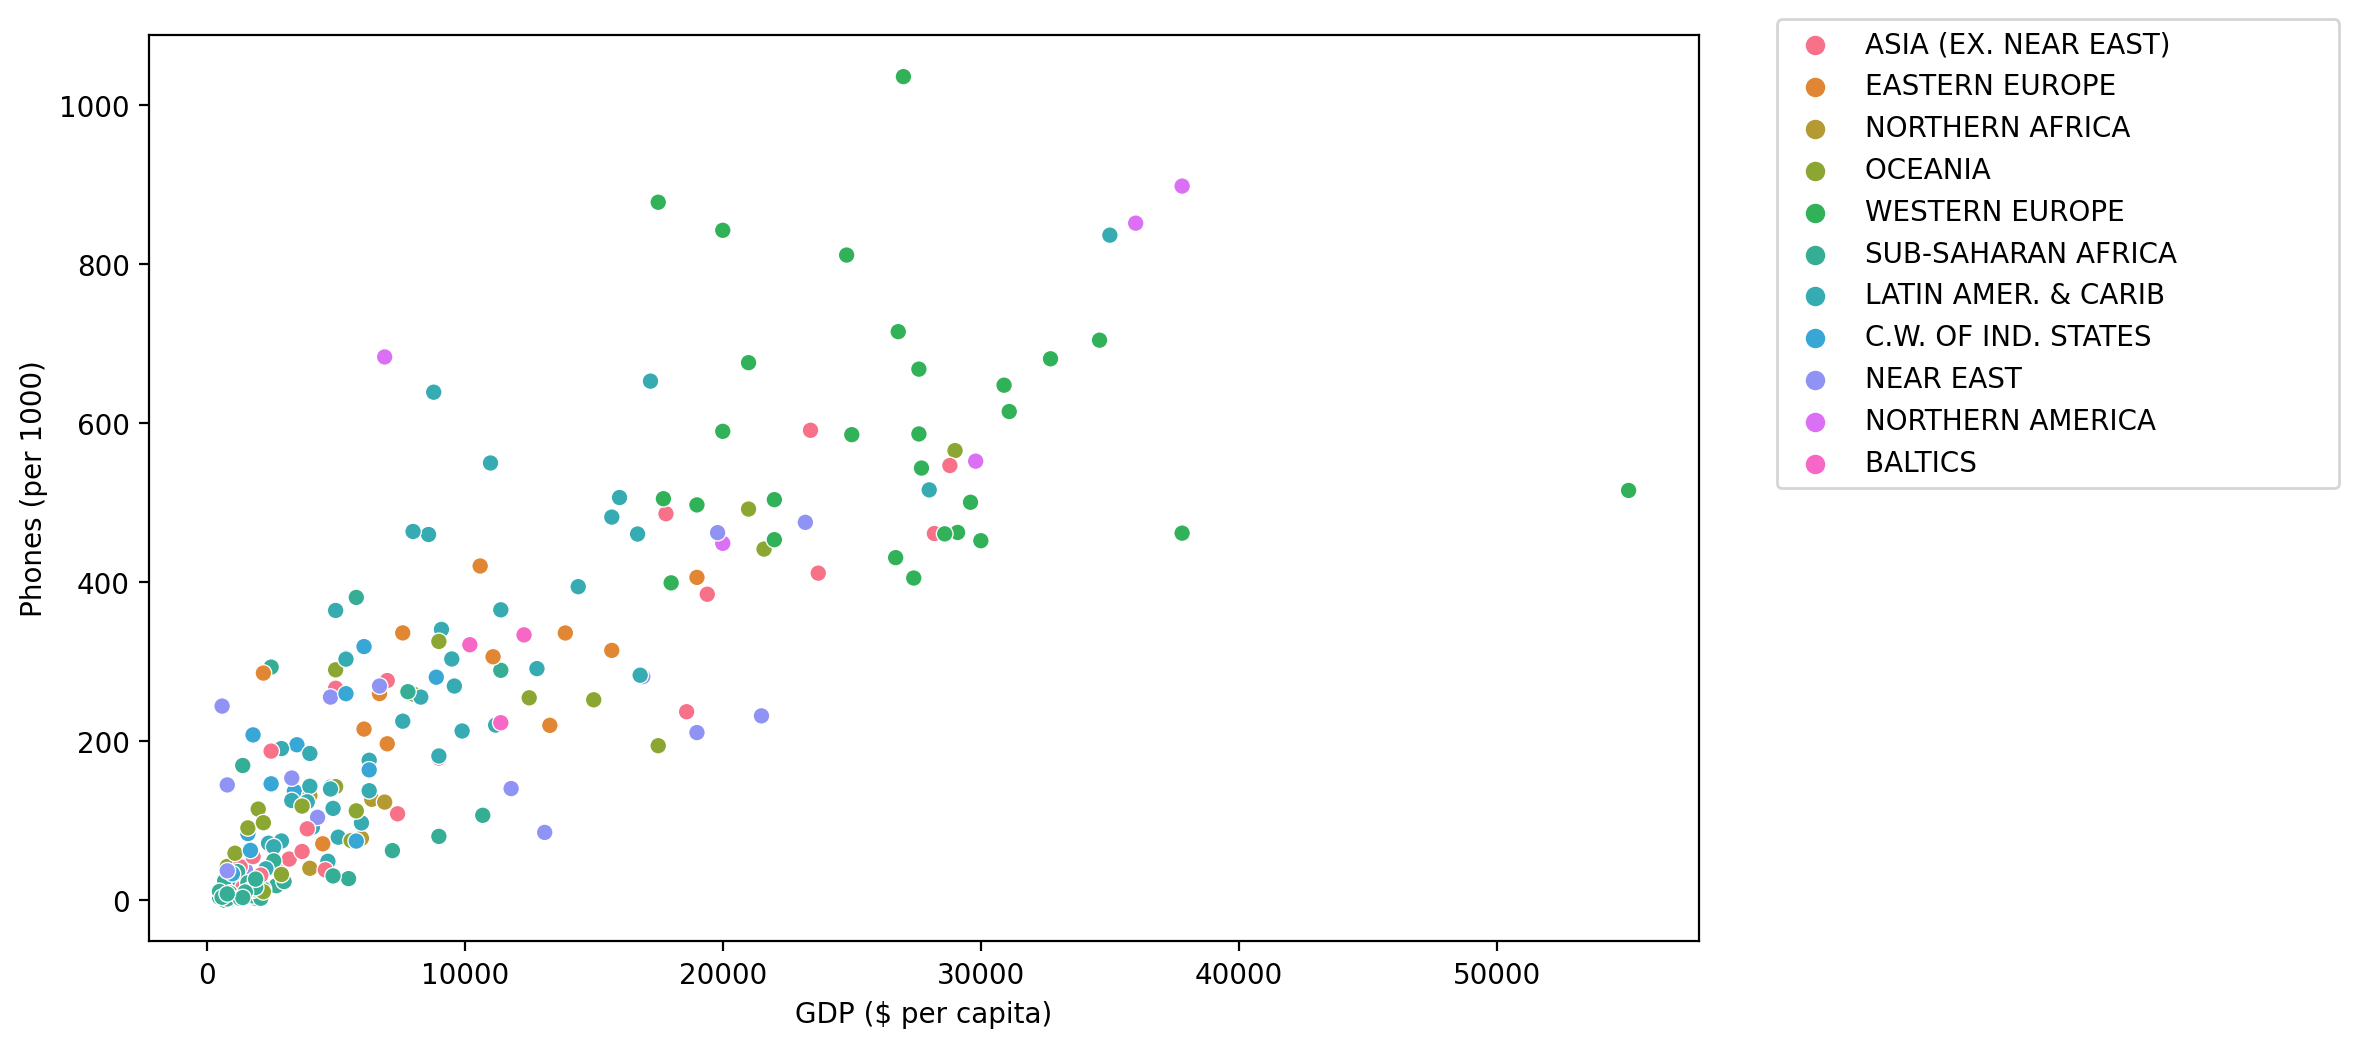

In [7]:
plt.figure(figsize=(10,6),dpi=200)

sns.scatterplot(data=df, x="GDP ($ per capita)", y="Phones (per 1000)", hue="Region")
plt.legend(loc=(1.05,0.5));

**TASK: Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?**

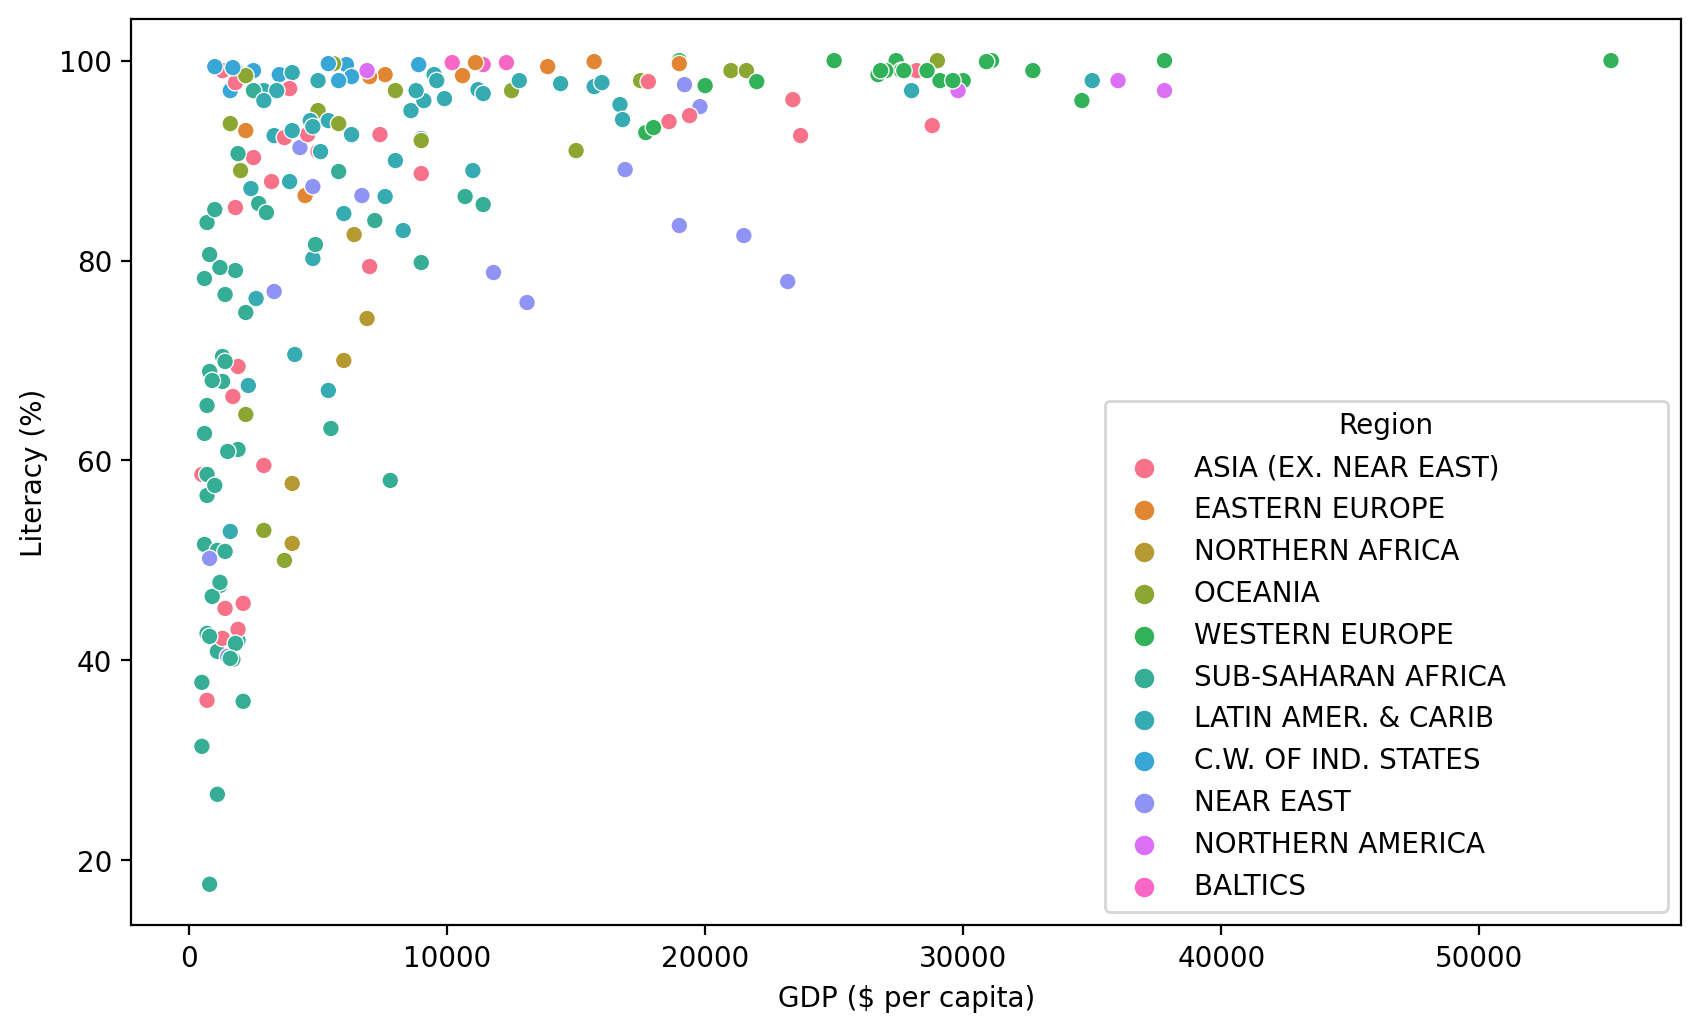

In [8]:
plt.figure(figsize=(10,6),dpi=200)

sns.scatterplot(data=df, x="GDP ($ per capita)", y="Literacy (%)", hue="Region");

**TASK: Create a Heatmap of the Correlation between columns in the DataFrame.**

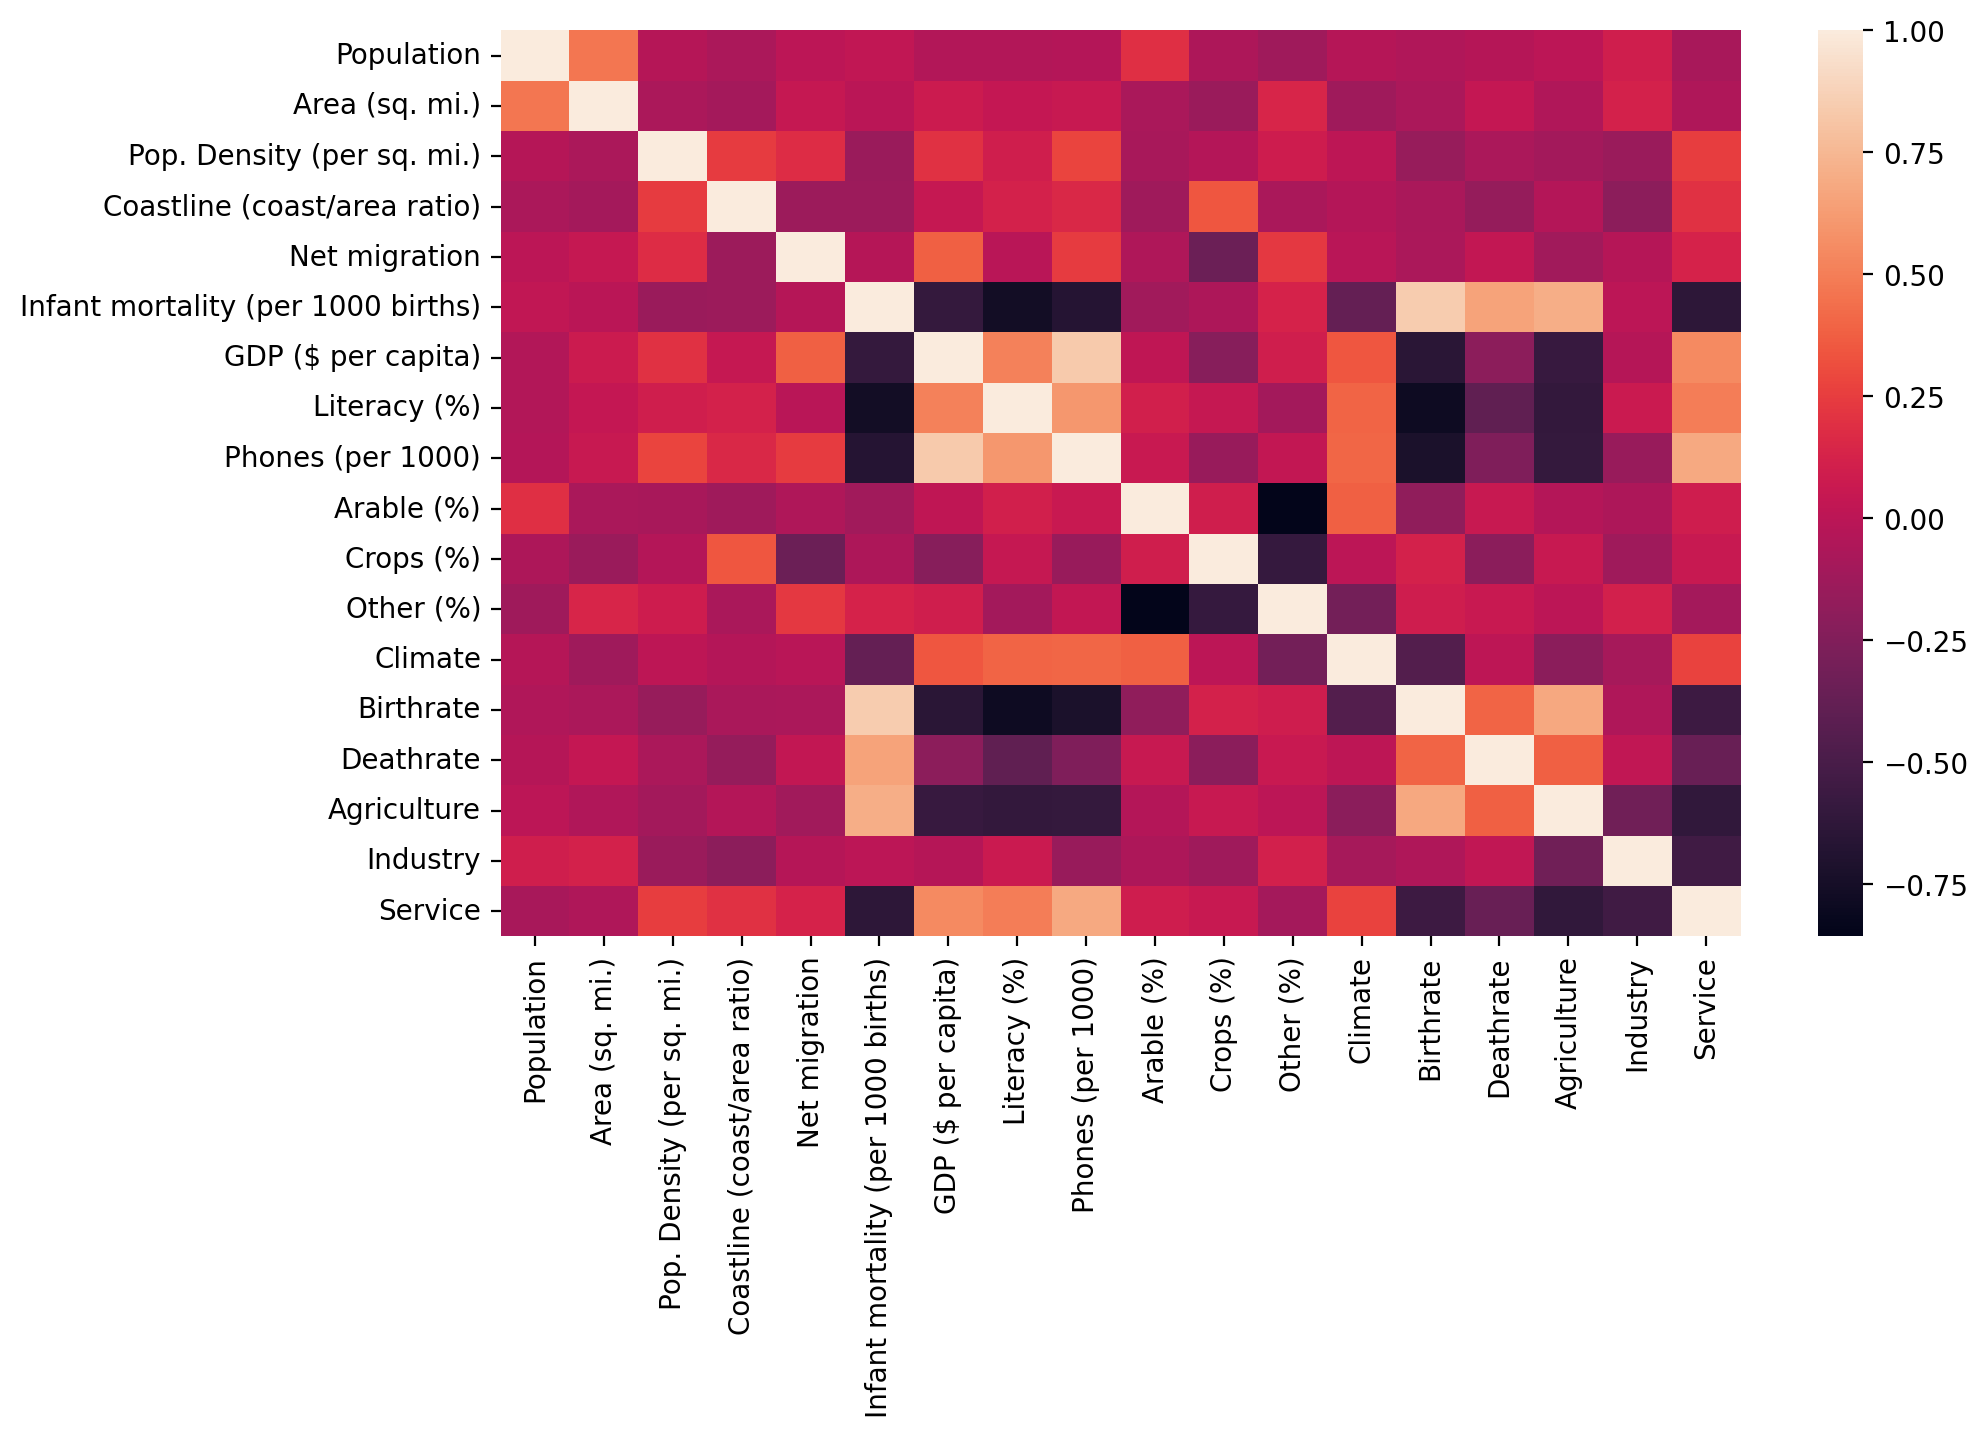

In [9]:
plt.figure(figsize=(10,6),dpi=200)

sns.heatmap(df.corr());

**TASK: Seaborn can auto perform hierarchal clustering through the clustermap() function. Create a clustermap of the correlations between each column with this function.**

<Figure size 2000x1200 with 0 Axes>

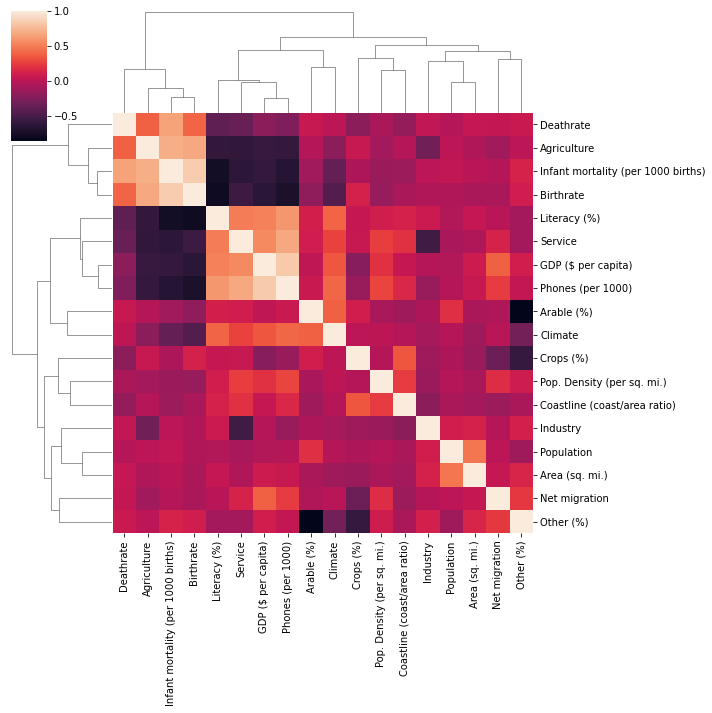

In [10]:
plt.figure(figsize=(10,6),dpi=200)

sns.clustermap(df.corr());

### Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

#### Missing Data

**TASK: Report the number of missing elements per column.**

In [11]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [12]:
filt1 = df["Agriculture"].isnull()

df["Country"][filt1]

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**TASK: You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant. There should be 15 countries in total you do this for.**    

In [13]:
df[filt1] = df[filt1].fillna(0)

**TASK: Now check to see what is still missing by counting number of missing elements again per feature:**

In [14]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

In [15]:
df["Climate"] = df.groupby(by="Region")["Climate"].transform(lambda z: z.fillna(z.mean()))

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: It looks like Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [17]:
df["Literacy (%)"] = df.groupby(by="Region")["Literacy (%)"].transform(lambda z: z.fillna(z.mean()))
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**TASK: Optional: We are now missing values for only a few countries. Go ahead and drop these countries OR feel free to fill in these last few remaining values with any preferred methodology. For simplicity, we will drop these.**

In [18]:
df.dropna(how="any", inplace=True)
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Data Feature Preparation

**TASK: It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [19]:
df1 =  df.drop(columns="Country")

**TASK: Now let's create the X array of features, the Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [20]:
X = pd.get_dummies(df1)

#### Scaling

**TASK: Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Creating and Fitting Kmeans Model

**TASK: Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD.**

In [23]:
from sklearn.cluster import KMeans

In [24]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(X_scaled)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

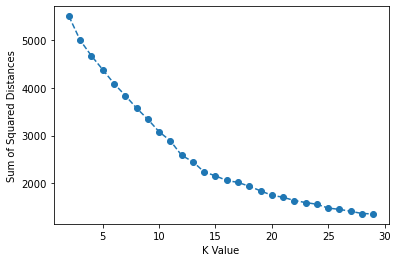

In [25]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

In [26]:
diff_ser = pd.Series(ssd).diff()
diff_ser.max(), diff_ser.argmax() + 1

(-8.338551891068391, 28)

From the elbow graph, it can be noted that there are several points in which the drop os significant and afterwards a stagnation occurs. Two points are worth remarking 15 and 26. 

In [27]:
def feature(X, K):
    X_s = scaler.fit_transform(X)
    df = pd.DataFrame(data=X_s, columns=X.columns)
    model = KMeans(n_clusters=K)
    model.fit_predict(X_s)
    df['Cluster'] = model.fit_predict(X_s)

    return df.corr()['Cluster'].sort_values()

In [28]:
# K = 15
feature(X, 15)

Region_SUB-SAHARAN AFRICA                    -0.498824
Birthrate                                    -0.372197
Region_LATIN AMER. & CARIB                   -0.323786
Deathrate                                    -0.259598
Infant mortality (per 1000 births)           -0.252725
Region_WESTERN EUROPE                        -0.239988
Agriculture                                  -0.121467
Other (%)                                    -0.083746
Crops (%)                                    -0.058709
Net migration                                -0.019187
GDP ($ per capita)                           -0.007421
Service                                       0.000081
Phones (per 1000)                             0.013928
Population                                    0.030196
Region_OCEANIA                                0.048555
Coastline (coast/area ratio)                  0.058428
Region_NORTHERN AMERICA                       0.092840
Region_NEAR EAST                              0.096258
Area (sq. 

In [29]:
# K = 26
feature(X, 26)

Region_WESTERN EUROPE                        -0.421173
Service                                      -0.352830
Phones (per 1000)                            -0.325148
Climate                                      -0.320706
Region_LATIN AMER. & CARIB                   -0.282344
GDP ($ per capita)                           -0.257106
Arable (%)                                   -0.237523
Literacy (%)                                 -0.197312
Region_EASTERN EUROPE                        -0.144841
Region_NORTHERN AFRICA                       -0.084187
Net migration                                -0.031477
Region_BALTICS                               -0.028875
Population                                   -0.024181
Region_C.W. OF IND. STATES                    0.000221
Pop. Density (per sq. mi.)                    0.078581
Region_NEAR EAST                              0.079673
Area (sq. mi.)                                0.095855
Coastline (coast/area ratio)                  0.096939
Other (%) 

### BONUS CHALLGENGE:
Geographical Model Interpretation. The best way to interpret this model is through visualizing the clusters of countries on a map! 


**TASK: Create cluster labels for a chosen K value. Based on the solutions, we believe either K=3 or K=15 are reasonable choices. But feel free to choose differently and explore.**

In [30]:
iso_codes = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Unsupervised Learning/KMeans Clustering/Data Sets/country_iso_codes.csv")

In [31]:
df = df.merge(iso_codes, how="inner")

In [32]:
X = df.drop(columns=["Country", "ISO Code"])
X = pd.get_dummies(X)
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,...,0,0,0,0,0,0,0,0,0,0
181,16025,274,58.5,47.08,0.00,0.00,3700.0,50.0,118.6,5.00,...,0,0,0,0,0,0,0,1,0,0
182,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
183,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


In [33]:
def feature(X, K):
    X_s = scaler.fit_transform(X)
    df = pd.DataFrame(data=X_s, columns=X.columns)
    model = KMeans(n_clusters=K)
    model.fit_predict(X_s)
    df['Cluster'] = model.fit_predict(X_s)

    return df

In [34]:
data_set = feature(X, 15)
data_set[["ISO Code", "Country"]] = df[["ISO Code", "Country"]]
data_set

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Cluster,ISO Code,Country
0,-0.023963,-0.040513,-0.250543,-0.343220,5.244949,3.342240,-0.861495,-1.900032,-0.962194,-0.096837,...,-0.483046,-0.251433,-0.166667,-0.148659,-0.318105,-0.558620,-0.386094,14,AFG,Afghanistan
1,-0.236105,-0.356880,-0.146808,-0.311509,-1.144262,-0.447217,-0.489783,0.274443,-0.648420,0.582457,...,-0.483046,-0.251433,-0.166667,-0.148659,-0.318105,-0.558620,-0.386094,4,ALB,Albania
2,-0.009500,0.846200,-0.296858,-0.342213,-0.107927,-0.193427,-0.343054,-0.436029,-0.616581,-0.772340,...,-0.483046,-0.251433,6.000000,-0.148659,-0.318105,-0.558620,-0.386094,0,DZA,Algeria
3,-0.263314,-0.371477,0.077725,1.123808,-4.746326,-0.775164,-0.147416,0.726562,0.220458,-0.258321,...,-0.483046,-0.251433,-0.166667,-0.148659,3.143621,-0.558620,-0.386094,10,ASM,American Samoa
4,-0.263210,-0.371339,-0.109567,-0.343220,1.487663,-0.914909,0.928594,0.855738,1.317283,-0.848154,...,-0.483046,-0.251433,-0.166667,-0.148659,-0.318105,-0.558620,2.590045,1,AND,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.387933,-0.203075,0.031274,-0.316794,-0.121623,-0.328621,-0.685421,0.438067,-0.110851,0.497545,...,-0.483046,-0.251433,-0.166667,-0.148659,-0.318105,-0.558620,-0.386094,9,VNM,Vietnam
181,-0.263636,-0.371438,-0.236324,0.841678,-0.018903,-1.023332,-0.568038,-1.297207,-0.429701,-0.637391,...,-0.483046,-0.251433,-0.166667,-0.148659,3.143621,-0.558620,-0.386094,10,WLF,Wallis and Futuna
182,-0.098092,-0.101629,-0.260564,-0.334160,-0.018903,0.623094,-0.851714,-1.288595,-0.805307,-0.805698,...,-0.483046,3.977208,-0.166667,-0.148659,-0.318105,-0.558620,-0.386094,5,YEM,Yemen
183,-0.174951,0.013231,-0.294827,-0.343220,-0.018903,1.340293,-0.851714,0.020395,-0.939123,-0.479698,...,-0.483046,-0.251433,-0.166667,-0.148659,-0.318105,1.790124,-0.386094,3,ZMB,Zambia


**TASK: Let's put you in the real world! Your boss just asked you to plot out these clusters on a country level choropleth map**

1. Figure out how to install plotly library: https://plotly.com/python/getting-started/

2. Figure out how to create a geographical choropleth map using plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

In [35]:
import plotly.express as px

fig = px.choropleth(data_set, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()